# Actividad 6: Redes neuronales.


**Equipo:**

Rafael Medellín García 2021626

Patricio Leija Treviño 1996641

Juan Carlos Garcia Reyes 2000889

Carlos Andrés Chávez Rivera 2109415

Carlos Eduardo Estrada Hernández 2109339
   
**Hora:** Martes N4-N6

# **Cargar Librerías**

In [41]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import models, layers

# Librerías de apoyo
import numpy as np
import matplotlib.pyplot as plt

# **Cargar Datos**

In [2]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# **Preprocesamiento de Datos**

In [3]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro',
               'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

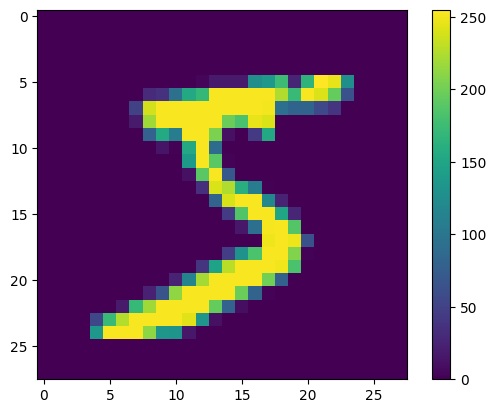

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

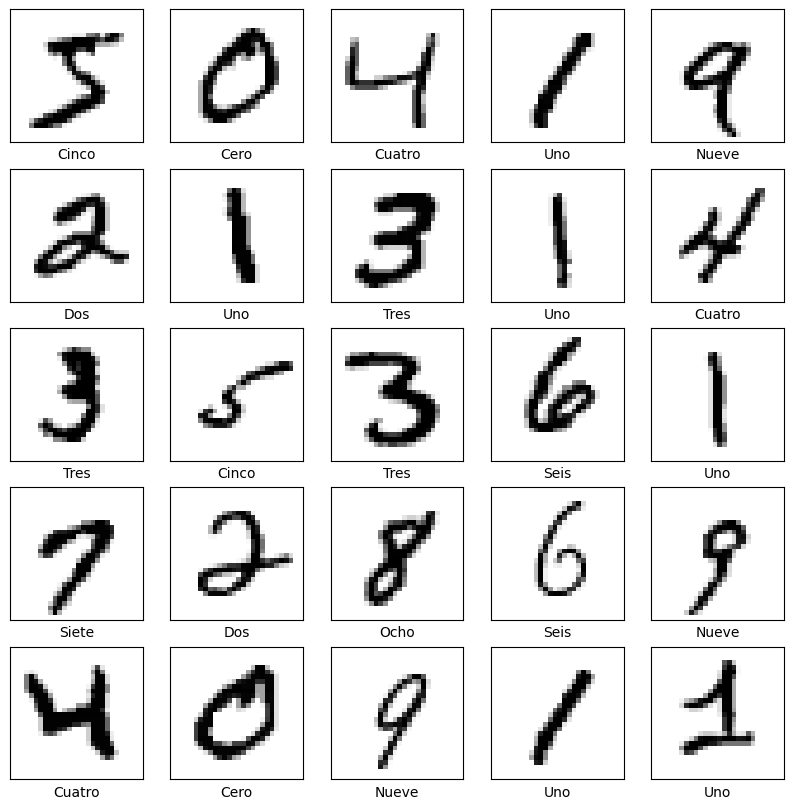

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Crear base del modelo convolucional**

In [71]:
model = models.Sequential()

# Capas Convolucionales y de Pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())

# Aplanar y Capas Densas
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10,))

In [57]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_9 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_10 (Ba  (None, 11, 11, 64)        256       
 tchNormalization)                                               
                                                      

# **Compilación y entrenamiento del modelo**

In [58]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 107s 56ms/step - loss: 0.1499 - accuracy: 0.9564 - val_loss: 0.0754 - val_accuracy: 0.9784
Epoch 2/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0678 - accuracy: 0.9807 - val_loss: 0.0629 - val_accuracy: 0.9838
Epoch 3/10
1875/1875 [==============================] - 110s 58ms/step - loss: 0.0552 - accuracy: 0.9841 - val_loss: 0.0406 - val_accuracy: 0.9886
Epoch 4/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0490 - accuracy: 0.9867 - val_loss: 0.0614 - val_accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0386 - accuracy: 0.9892 - val_loss: 0.0324 - val_accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0364 - accuracy: 0.9897 - val_loss: 0.0345 - val_accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0293 - accuracy: 0.9918 - val_loss: 0.0

In [59]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 4s 11ms/step - loss: 0.0364 - accuracy: 0.9926
Test accuracy: 0.9926000237464905


# **Prueba de modelo**

In [60]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [61]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 4s 11ms/step


In [62]:
predictions[65]

array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.23196931,
       0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674],
      dtype=float32)

In [64]:
np.argmax(predictions[65])

4

In [65]:
test_labels[65]

4

In [66]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

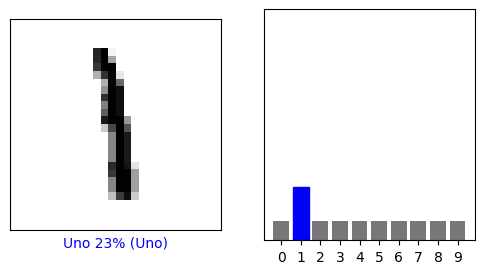

In [67]:
i = 29
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

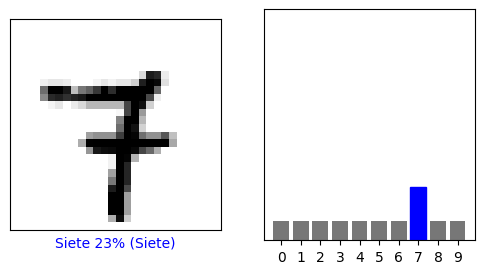

In [68]:
i = 75
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

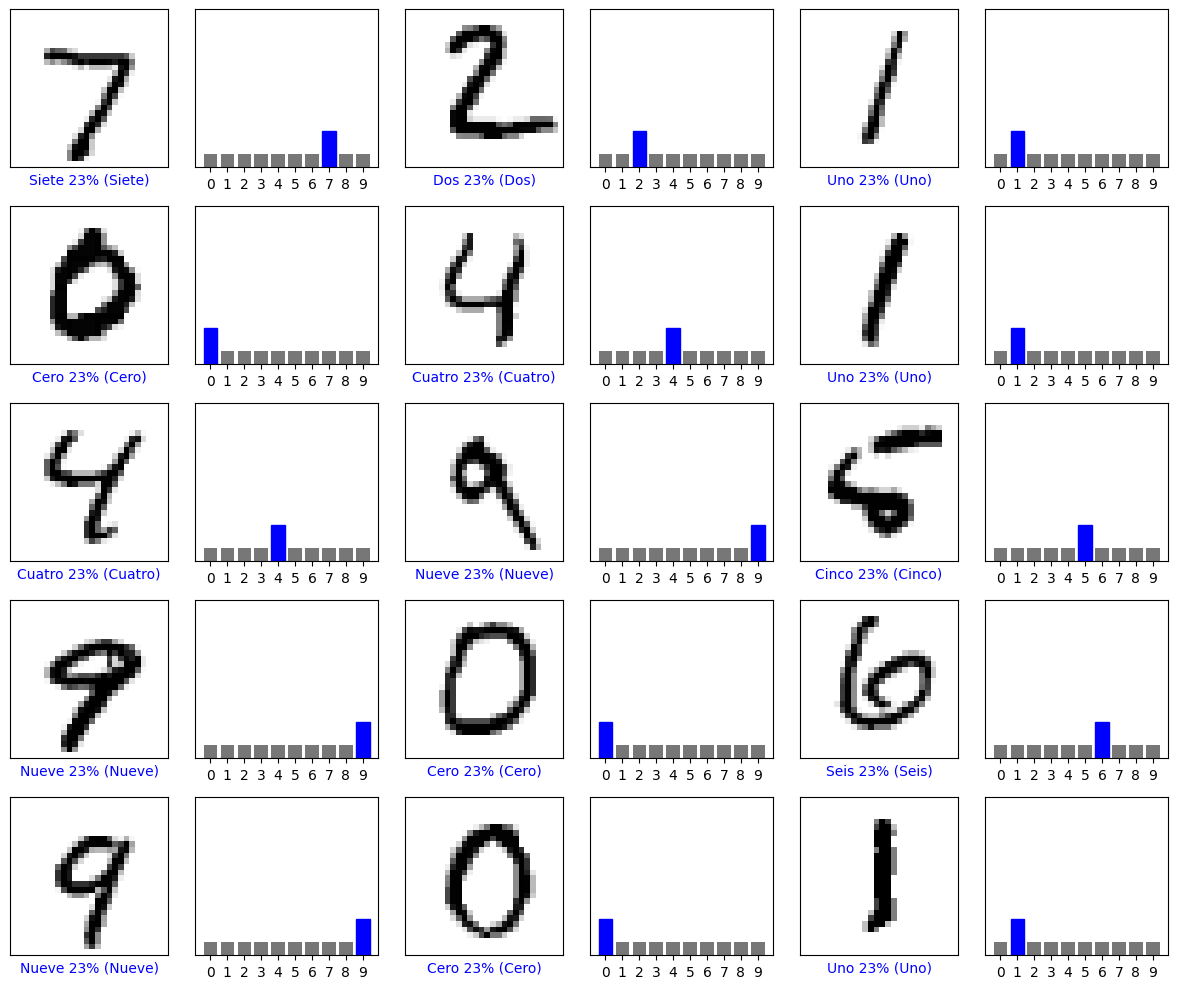

In [72]:
# El color azul indica una predicción correcta y el color rojo indica una predicción incorrecta.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# **Responde las siguientes preguntas:**

**¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?** R: Se usaron 10 epocas de entrenamiento al igual que en la red preealimentada pero a diferencia de la RNP esta CNN logro conseguir una mejora incluso con la misma cantidad de epocas de entrenamiento.

**¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?** R: Si se otuvo una mejora de aproximadamente 2% en comparación a la actividad 5, esto debido a que las CNN son altamente eficaces para el procesamiento y análisis de imágenes y datos con estructura espacial, en este ejemplo al contar con dataset bastante sencillo como lo es MNIST la brecha de mejora quizas no es tan significativa entre la red prealimentada y la convolucional, pero conforme la estructura de las imagenes se vuelva más compleja (mayor resolución de las imagenes, a color en lugar de escala de grises, figuras no tan centradas, etc) la red neuronal prealimentada dejara de ser tan eficaz y se tendra que recurrir a una red neuronal convolucional que es mejor en este aspecto.
